### Keras
- 종속변수 y는 one-hot encoding으로 넣어줘야 한다.(keras 자체 함수 존재)
- N x M 행렬 형태여야한다.(2차원) : shape찍었을때 (784,64,64) 이러면 안됨(reshape해야함)

##### Case1 : MNIST

In [1]:
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

In [4]:
X_train0.shape, X_test0.shape # reshape필요

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_test0[0,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

데이터가 0~255까지의 숫자를 갖는다(8bit이기 때문) --> 스케일링으로 0~1사이로 바꿔줘야함, float으로 형변환도 필요

In [6]:
X_train = X_train0.reshape(60000,784).astype("float32") / 255.0
X_test = X_test0.reshape(10000,784).astype("float32") / 255.0
print(X_train.shape, X_test.dtype)

(60000, 784) float32


In [11]:
y_train0[:5], set(y_train0)

(array([5, 0, 4, 1, 9], dtype=uint8), {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

y_train0은 one-hot Encoding을 해야함.

In [12]:
# y값 one-hot encoding
# keras 자체 Label Encoder가 있음
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0,10) # 10은 종속변수의 클래스/카테고리 갯수
Y_test = np_utils.to_categorical(y_test0,10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

셋팅 완료

##### 모델링해보자

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [22]:
np.random.seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation='sigmoid')) # hidden layer 15개 노드 설정
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy'])

- input, hidden, output layer 순서로 add(), 여기선 input과 hidden layer를 같이 씀 
- input_dim : input layer의 노드 갯수(컬럼수) = 고정값
- 첫 번째 model.add()에서 15는 hidden layer의 노드 갯수 = 내가 설정해줘야함(변동값)
- 두 번째 model.add()에서 10은 output layer의 노드 갯수(종속변수 카테고리 갯수) = 고정값

mean_squared_error : RSS

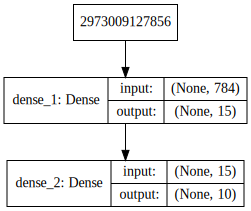

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [16]:
model.summary() # 구해야 할 parameter의 갯수를 알려줌

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


- dense_1 : input - hidden layer로 이어질 때 생기는 w의 갯수:11760개(784*15) + b의 갯수:15개(노드당 1개씩)
- dense_2 : hidden - output layer로 이어질 때 생기는 w의 갯수:150개(15*10) + b의 갯수:10개(노드당 1개씩)

In [17]:
# 좀 더 자세하게 보고싶다면...
# layer별로..
l1 = model.layers[0]
l2 = model.layers[1]

In [18]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()

('dense_1', keras.layers.core.Dense, (None, 15), 'sigmoid', 11775)

In [19]:
l2.name, type(l2), l2.output_shape, l2.activation.__name__, l2.count_params()

('dense_2', keras.layers.core.Dense, (None, 10), 'sigmoid', 160)

In [23]:
# 본격 모델링
hist = model.fit(X_train, Y_train,
                epochs=40, batch_size=100, # mini-batch size가 100이고 총 데이터가 60000개니까 600번 w업데이트한다는 의미
                validation_data=(X_test, Y_test),
                verbose=2) # verbose는 그냥 2로 설정해주는게 좋다고 한다...(박사님 said)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
 - 1s - loss: 0.1019 - acc: 0.2440 - val_loss: 0.0864 - val_acc: 0.3212
Epoch 2/40
 - 1s - loss: 0.0845 - acc: 0.3921 - val_loss: 0.0821 - val_acc: 0.4409
Epoch 3/40
 - 1s - loss: 0.0796 - acc: 0.4997 - val_loss: 0.0765 - val_acc: 0.5340
Epoch 4/40
 - 1s - loss: 0.0740 - acc: 0.5620 - val_loss: 0.0707 - val_acc: 0.5852
Epoch 5/40
 - 1s - loss: 0.0682 - acc: 0.6149 - val_loss: 0.0649 - val_acc: 0.6522
Epoch 6/40
 - 1s - loss: 0.0625 - acc: 0.6759 - val_loss: 0.0594 - val_acc: 0.6998
Epoch 7/40
 - 1s - loss: 0.0576 - acc: 0.7101 - val_loss: 0.0551 - val_acc: 0.7316
Epoch 8/40
 - 1s - loss: 0.0537 - acc: 0.7325 - val_loss: 0.0516 - val_acc: 0.7485
Epoch 9/40
 - 1s - loss: 0.0505 - acc: 0.7474 - val_loss: 0.0486 - val_acc: 0.7639
Epoch 10/40
 - 1s - loss: 0.0478 - acc: 0.7608 - val_loss: 0.0461 - val_acc: 0.7759
Epoch 11/40
 - 1s - loss: 0.0455 - acc: 0.7739 - val_loss: 0.0439 - val_acc: 0.7893
Epoch 12/40
 - 1s - loss: 0.0435 - 

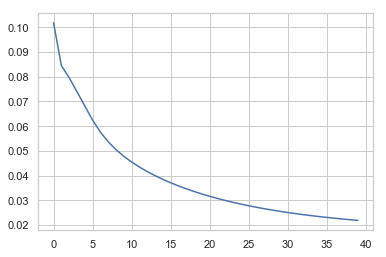

In [24]:
plt.plot(hist.history['loss'])
plt.show()

loss가 아름 답게 떨어진다....

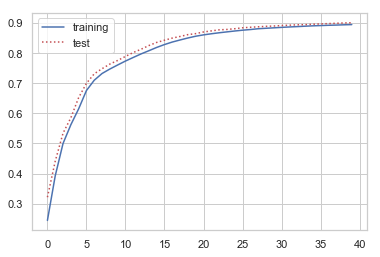

In [25]:
plt.plot(hist.history['acc'], 'b-', label='training')
plt.plot(hist.history['val_acc'], 'r:', label='test')
plt.legend()
plt.show()

#### 연습문제 1 : iris

#### 연습문제 2 : olivetti